In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv("./FPT.csv")
# Chuyển cột 'Date/Time' sang định dạng datetime
df['Date/Time'] = pd.to_datetime(df['Date/Time']).dt.strftime('%Y%m%d%H%M')

In [3]:
# Read CSV file
df = pd.read_csv("./FPT.csv")

# Convert 'Date/Time' to datetime format
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Sort DataFrame by 'Date/Time'
df = df.sort_values(by='Date/Time')

# Rename 'Date/Time' to 'Minus' and format it
df['Minus'] = df['Date/Time'].dt.strftime('%Y%m%d%H%M')

# Extract 'Hours' and 'Days'
df["Hours"] = df['Date/Time'].dt.strftime('%Y%m%d%H')
df["Days"] = df['Date/Time'].dt.strftime('%Y%m%d')

# Reorder columns
df = df[['Minus', 'Hours', 'Days', 'Open', 'High', 'Low', 'Close', 'Volume', 'Ticker', 'Open Interest']]


In [4]:
df.head()

,Minus,Hours,Days,Open,High,Low,Close,Volume,Ticker,Open Interest
0,201812250915,2018122509,20181225,30.89,30.89,30.89,30.89,35410,FPT,0
1,201812250916,2018122509,20181225,30.81,30.81,30.81,30.81,190,FPT,0
2,201812250917,2018122509,20181225,30.74,30.81,30.74,30.74,1120,FPT,0
3,201812250918,2018122509,20181225,30.74,30.74,30.74,30.74,2120,FPT,0
4,201812250919,2018122509,20181225,30.74,30.74,30.74,30.74,22500,FPT,0


### 1. Price fluctuations in a minus

In [66]:
df_minus = df.copy()
df_minus['minus_fluct'] = df_minus['Close'] - df_minus['Close'].shift(periods=1)

In [67]:
df_minus

,Minus,Hours,Days,Open,High,Low,Close,Volume,Ticker,Open Interest,minus_fluct
0,201812250915,2018122509,20181225,30.89,30.89,30.89,30.89,35410,FPT,0,NaN
1,201812250916,2018122509,20181225,30.81,30.81,30.81,30.81,190,FPT,0,-0.08
2,201812250917,2018122509,20181225,30.74,30.81,30.74,30.74,1120,FPT,0,-0.07
3,201812250918,2018122509,20181225,30.74,30.74,30.74,30.74,2120,FPT,0,0.00
4,201812250919,2018122509,20181225,30.74,30.74,30.74,30.74,22500,FPT,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
97401,202012221424,2020122214,20201222,58.20,58.20,58.20,58.20,27470,FPT,0,0.00
97402,202012221425,2020122214,20201222,58.20,58.20,58.20,58.20,14820,FPT,0,0.00
97403,202012221426,2020122214,20201222,58.20,58.20,58.20,58.20,500,FPT,0,0.00
97404,202012221429,2020122214,20201222,58.10,58.10,58.10,58.10,2500,FPT,0,-0.10


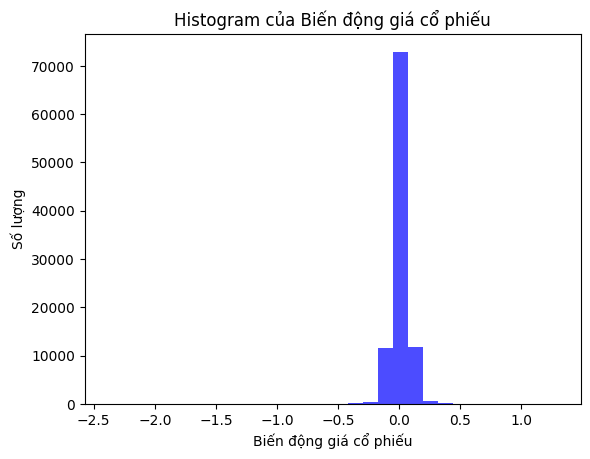

In [19]:
import matplotlib.pyplot as plt

# Vẽ histogram
plt.hist(df['fluct'], bins=30, color='blue', alpha=0.7)

# Đặt tên cho trục x và y
plt.xlabel('Biến động giá cổ phiếu')
plt.ylabel('Số lượng')

# Đặt tiêu đề cho biểu đồ
plt.title('Histogram của Biến động giá cổ phiếu')

# Hiển thị biểu đồ
plt.show()


### 2. Price fluctuations in a hours

In [20]:
# df_hours = df.copy()
# df_hours.set_index('Hours', inplace=True)   
# list_index = df_hours.index.unique()
# # Iterate over each index and calculate price volatility
# for index_value in list_index:
#     price_volatility = df_hours.loc[index_value, 'Close'].max() - df_hours.loc[index_value, 'Close'].min()
#     # Assign the calculated value to the 'Price_Volatility' column
#     df_hours.loc[index_value, 'Price_Volatility_By_Hours'] = price_volatility

In [63]:
def calculate_hours_volatility(df):
    df_hours = df.copy()
    df_hours.set_index('Hours', inplace=True) 
    hourly_volatility = df_hours.groupby(df_hours.index)['Close'].agg(lambda x: x.max() - x.min())
    # Create a new DataFrame to store the results
    result_df = pd.DataFrame({'hourly_volatility': hourly_volatility})
    return result_df

In [64]:
calculate_hours_volatility(df)

,hourly_volatility
Hours,
2018122509,0.23
2018122609,0.33
2018122610,0.12
2018122611,0.15
2018122613,0.15
...,...
2020122209,0.50
2020122210,0.20
2020122211,0.50


### 3. Price fluctuations in a day

In [22]:
# df_days = df.copy()
# df_days.set_index('Days', inplace=True)   
# list_index = df_days.index.unique()
# # Iterate over each index and calculate price volatility
# for index_value in list_index:
#     price_volatility = df_days.loc[index_value, 'Close'].max() - df_days.loc[index_value, 'Close'].min()
#     # Assign the calculated value to the 'Price_Volatility' column
#     df_days.loc[index_value, 'Price_Volatility_By_Days'] = price_volatility

In [ ]:
def calculate_daily_volatility(df):
    df_days = df.copy()
    df_days.set_index('Days', inplace=True) 
    daily_volatility = df_days.groupby(df_days.index)['Close'].agg(lambda x: x.max() - x.min())
    # Create a new DataFrame to store the results
    result_df = pd.DataFrame({'daily_volatility': daily_volatility})
    return result_df

In [62]:
calculate_daily_volatility(df)

,daily_volatility
Days,
20181225,0.23
20181226,0.33
20181227,0.30
20181228,0.30
20190102,0.71
...,...
20201216,0.40
20201217,1.00
20201218,0.40
